In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #60,000 training, 10,000 test images
x_train.shape

(60000, 28, 28)

3


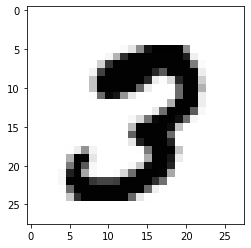

In [10]:
image_index = 12345 #upto 60000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys') #image in greyscale

In [11]:
#Reshaping to 4D
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
in_shape = (28, 28, 1)
#Float conversion
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalization
x_train /= 255
x_test /= 255
print(f'New shape: {x_train.shape}')
print(f'Training dataset size for predictor: {x_train.shape[0]}')
print(f'Test dataset size for predictor: {x_test.shape[0]}')

New shape: (60000, 28, 28, 1)
Training dataset size for predictor: 60000
Test dataset size for predictor: 10000


In [12]:
#Creating the CNN model and adding layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=in_shape))        #convolves input with kernel
model.add(MaxPooling2D(pool_size=(2, 2)))                             #reduces input representation
model.add(Flatten())                                                  # Flattening 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))                          #converts negative values to 0
model.add(Dropout(0.2))                                               #prevents overfitting
model.add(Dense(10,activation=tf.nn.softmax))                         #produces probability distribution

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2145 - accuracy: 0.9347
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0625 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0445 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0368 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0325 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0248 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0227 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0206 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0707 - accuracy: 0.9846


[0.07071921229362488, 0.9846000075340271]

8


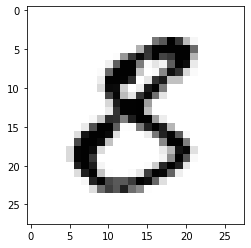

In [15]:
image_index = 1234
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())